In [15]:
import cv2
import albumentations as A
import numpy as np
from utils import plot_examples
from PIL import Image
import seaborn as sns
sns.set()

In [16]:
image = Image.open("images/elon.jpeg")

In [17]:
transform = A.Compose(
    [
        A.Resize(width=1920, height=1080),
        A.RandomCrop(width=1280, height=720),
        # If you don't want to have reflections after rotation
        A.Rotate(limit=40, p=0.9, border_mode=cv2.BORDER_CONSTANT),
        A.HorizontalFlip(p=0.1),
        A.VerticalFlip(0.5),
        A.RGBShift(r_shift_limit=25, g_shift_limit=25, b_shift_limit=25),
        A.OneOf(# Choose random transformation
            [
                A.Blur(blur_limit=3, p=0.5),
                A.ColorJitter(p=0.5),
                
            ], p=1.0), # Chance to use one of these transforms 
     ]
)

In [18]:
images_list = [image]
image = np.array(image)
for i in range(16):
    augmentation = transform(image=image)
    augmented_img = augmentation["image"]
    images_list.append(augmented_img)

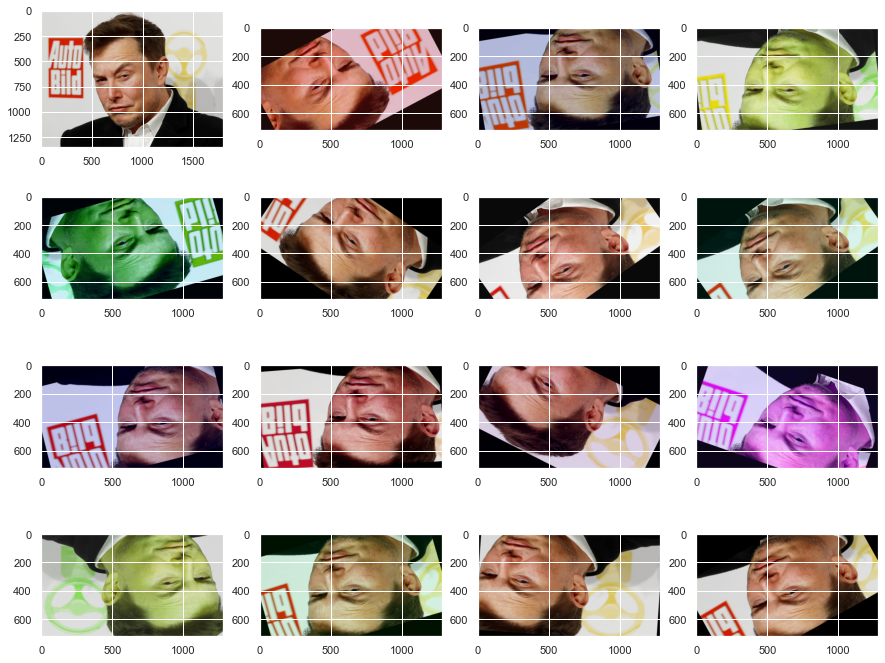

In [19]:
plot_examples(images_list)